이번에 배울 것
- 단어의 빈도를 이용해서 텍스트를 표현하는 방법들
- 텍스트의 분포를 이용해서 텍스트를 토큰화하는 방법

## 단어 빈도를 이용한 벡터화

머신러닝 모델은 기계이기 때문에, 텍스트보다는 수치화된 숫자를 더 잘 처리할 수 있다.  
이런 이유로 기계가 자연어 처리를 원활히 할 수 있도록,  
자연어 처리에서는 전처리 과정에서 텍스트를 숫자 벡터로 변환하는 벡터화(Vectorization) 라는 과정을 거치게 된다.

벡터화 방법
- 통계와 머신 러닝을 활용한 방법
- 인공 신경망을 활용한 방법

### 통계와 머신 러닝을 활용한 방법 - Bag of Words

BoW
- 자연어 처리(Natural Language Processing)나 정보 검색(Information Retrieval)에서 쓰이는 매우 간단한 단어 표현 방법
- 문서 내의 단어들의 분포를 보고 이 문서의 특성을 파악하는 기법

doc1 = 'John likes to watch movies. Mary likes movies too.'  
이를 벡터화하면  
BoW1 = {"John":1, "likes":2, "to":1, "watch":1, "movies":2, "Mary":1, "too":1}

doc2 = 'Mary also likes to watch football games.'  
이를 벡터화하면  
BoW2 = {"Mary":1, "also":1, "likes":1, "to":1, "watch":1, "football":1, "games":1}

BoW 에서는 단어의 순서는 중요하지 않기 때문에, BoW1 과 BoW2 는 본질적으로 동일하다.

이렇게 어순에 따라 달라지는 의미를 반영하지 못한다는 점에서 BoW는 한계를 가진다.

위 두 문장을 합쳐서  
doc3 = 'John likes to watch movies. Mary likes movies too. Mary also likes to watch football games.'  
이를 벡터화하면  
BoW3 = {"John":1, "likes":3, "to":2, "watch":2, "movies":2, "Mary":2, "too":1, "also":1, "football":1, "games":1}

#### Keras Tokenizer 를 활용하여 Bag of Words 생성

In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer

sentence = ["John likes to watch movies. Mary likes movies too! Mary also likes to watch football games."]

tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentence) # 단어장 생성
bow = dict(tokenizer.word_counts) # 각 단어와 각 단어의 빈도를 bow에 저장

print("Bag of Words :", bow) # bow 출력
print('단어장(Vocabulary)의 크기 :', len(tokenizer.word_counts)) # 중복을 제거한 단어들의 개수

Bag of Words : {'john': 1, 'likes': 3, 'to': 2, 'watch': 2, 'movies': 2, 'mary': 2, 'too': 1, 'also': 1, 'football': 1, 'games': 1}
단어장(Vocabulary)의 크기 : 10


#### scikit-learn CountVectorizer 활용

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

sentence = ["John likes to watch movies. Mary likes movies too! Mary also likes to watch football games."]

vector = CountVectorizer()
bow = vector.fit_transform(sentence).toarray()

print('Bag of Words : ', bow) # 코퍼스로부터 각 단어의 빈도수를 기록한다.
print('각 단어의 인덱스 :', vector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되었는지를 보여준다.

Bag of Words :  [[1 1 1 1 3 2 2 2 1 2]]
각 단어의 인덱스 : {'john': 3, 'likes': 4, 'to': 7, 'watch': 9, 'movies': 6, 'mary': 5, 'too': 8, 'also': 0, 'football': 1, 'games': 2}


In [6]:
print('단어장(Vocabulary)의 크기 :', len(vector.vocabulary_))

단어장(Vocabulary)의 크기 : 10


### 통계와 머신 러닝을 활용한 방법 - DTM(Document-Term Matrix)

Bag of Words 는 DTM(Document-Term Matrix) 이라는 개념 이해를 돕기 위해서 알고 있어야 하기에 먼저 설명하였다.

DTM(Document-Term Matrix) 는
- 문서-단어 행렬
- 여러 문서의 Bag of Words 를 하나의 행렬로 구현한 것
- 다시 말해 DTM 은 각 문서에 등장한 단어의 빈도수를 하나의 행렬로 통합한다.

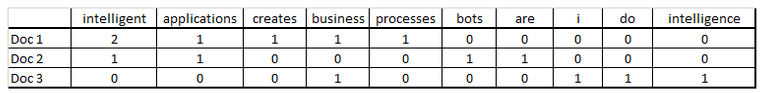

In [7]:
from IPython.display import Image
Image(filename='capture/dtm_example.png') 

DTM을 사용하면 각 문서들을 비교하고, 각 문서 간 유사도를 구할 수 있다.

예를 들어
- I like dog
- I like cat
- I like cat I like cat

각 단어에 대한 인덱스를 cat은 0, dog는 1, I는 2, like는 3이라고 했을 때 생성되는 DTM의 형태는 아래와 같다.

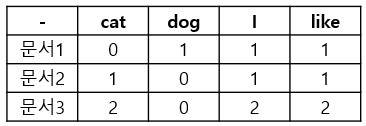

In [8]:
from IPython.display import Image
Image(filename='capture/dtm_example2.png')

이제 각 문서 벡터의 유사도를 구해보자. (ex: 코사인 유사도)

In [9]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

doc1 = np.array([0,1,1,1]) # 문서1 벡터
doc2 = np.array([1,0,1,1]) # 문서2 벡터
doc3 = np.array([2,0,2,2]) # 문서3 벡터

def cos_sim(A, B):
    return dot(A, B)/(norm(A)*norm(B))

In [10]:
print(cos_sim(doc1, doc2)) #문서1과 문서2의 코사인 유사도
print(cos_sim(doc1, doc3)) #문서1과 문서3의 코사인 유사도
print(cos_sim(doc2, doc3)) #문서2과 문서3의 코사인 유사도

0.6666666666666667
0.6666666666666667
1.0000000000000002


한 문서 내의 모든 단어의 빈도수가 똑같이 증가하는 경우에는 기존의 문서와 코사인 유사도의 값이 1이 된다.

#### 사이킷런의 CountVectorizer를 이용하여 DTM을 만드는 방법

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    'John likes to watch movies',
    'Mary likes movies too',
    'Mary also likes to watch football games',    
]
vector = CountVectorizer()

print(vector.fit_transform(corpus).toarray()) # 코퍼스로부터 각 단어의 빈도수를 기록.
print(vector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되었는지를 보여준다.

[[0 0 0 1 1 0 1 1 0 1]
 [0 0 0 0 1 1 1 0 1 0]
 [1 1 1 0 1 1 0 1 0 1]]
{'john': 3, 'likes': 4, 'to': 7, 'watch': 9, 'movies': 6, 'mary': 5, 'too': 8, 'also': 0, 'football': 1, 'games': 2}


#### DTM 의 한계점

DTM은 bag of words 기반으로 문서를 비교할 수 있는 행렬이다. 그런데 DTM 은 2가지 한계점을 지닌다.
- DTM에서 문서의 수와 단어의 수가 계속 늘어날수록, 행과 열은 대부분의 값이 0을 가진다는 특징이 있다.  
  이는 저장 공간 측면에서 낭비이다.
- 단어의 빈도에만 집중하는 방법 자체의 한계  
  사실 여러 문서에는 중요한 단어와 중요하지 않은 단어들이 혼재되어 있는데,  
  'the'와 같이 아무 문서에나 자주 등장하는 단어들은 문서끼리 비교할 때 그다지 도움이 되지 않는다.  
  그렇다면 중요한 단어와 중요하지 않은 단어에 가중치를 따로 선별해서 주는 방법은 없을까?

### 단어 빈도를 이용한 벡터화 - TF-IDF

각 단어의 중요도를 판단하여 가중치를 주는 방법인 TF-IDF에 대해서 알아보자.

TF-IDF
- Term Frequency-Inverse Document Frequency의 약자
- 단어 빈도-역문서 빈도

TF-IDF는 모든 문서에서 자주 등장하는 단어는 중요도가 낮다고 판단하며, 특정 문서에서만 자주 등장하는 단어는 중요도가 높다고 판단하는 것이다.

TF-IDF는 불용어처럼 중요도가 낮으면서 모든 문서에 등장하는 단어들이 노이즈가 되는 것을 완화해 준다.  
단, 주의할 점은 TF-IDF를 사용하는 것이 DTM을 사용하는 것보다 성능이 항상 뛰어나지는 않다는 점이다.

TF-IDF를 사용하기 위해서는 우선 DTM을 만든 뒤에 TF-IDF 가중치를 DTM에 적용한다.

단어의 빈도를 의미하는 TF는 사실 이미 배웠다. DTM이 이미 TF 행렬이기 때문이다.  
그리고 DTM의 각 단어에 IDF 값을 곱해주면 TF-IDF 행렬이 완성된다.

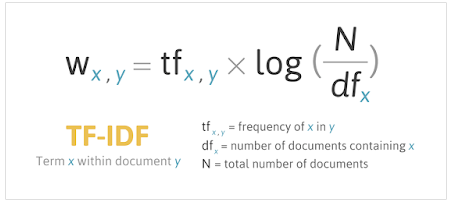

In [12]:
from IPython.display import Image
Image(filename='capture/TF-IDF.png')

역문서 빈도인 IDF는 어떻게 구할까?

ex: 전체 문서가 5개. 그리고 단어 'like' 가 문서2에서 200번, 문서3에서 300번 등장했다고 하자. 이 때 'like' 의 IDF 는?

- 우선 like 의 DF 를 구하자.
  - DF 는 문서의 빈도이므로 'like' 의 DF 는 2 이다. (문서에서 몇 번 등장한 건 중요하지 않다.)
- 전체 문서의 수인 N 은?
  - 젠처 문서는 5개 이므로 N 은 5

그러므로 'like' 의 IDF 는 log(5/2) 이다.

더 나아가, 문서 2와 문서 3에서의 단어 'like' 의 TF-IDF 값은 얼마?
- 문서 2의 경우
  - 'like' 가 200 번 등장했으므로
  - 200 * log(5/2)
- 문서 3의 경우
  - 'like' 가 300 번 등장했으므로
  - 300 * log(5/2)

'like' 단어는 문서 3에서의 TF-IDF 값이 더 높다.

#### TF-IDF 구현

In [16]:
from math import log
import pandas as pd

In [15]:
docs = [
  'John likes to watch movies and Mary likes movies too',
  'James likes to watch TV',
  'Mary also likes to watch football games',  
]

In [17]:
vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()
print('단어장의 크기 :', len(vocab))
print(vocab)

단어장의 크기 : 13
['James', 'John', 'Mary', 'TV', 'also', 'and', 'football', 'games', 'likes', 'movies', 'to', 'too', 'watch']


In [18]:
N = len(docs) # 총 문서의 수
N

3

In [19]:
def tf(t, d):
    return d.count(t)
 
def idf(t):
    df = 0
    for doc in docs:
        df += t in doc    
    return log(N/(df + 1)) + 1
 
def tfidf(t, d):
    return tf(t,d)* idf(t)

In [20]:
result = []
for i in range(N): # 각 문서에 대해서 아래 명령을 수행
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]
        
        result[-1].append(tf(t, d))
        
tf_ = pd.DataFrame(result, columns = vocab)
tf_

,James,John,Mary,TV,also,and,football,games,likes,movies,to,too,watch
0,0,1,1,0,0,1,0,0,2,2,2,1,1
1,1,0,0,1,0,0,0,0,1,0,1,0,1
2,0,0,1,0,1,0,1,1,1,0,1,0,1


In [21]:
# 각 단어의 IDF 를 구해보자
result = []
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))

idf_ = pd.DataFrame(result, index = vocab, columns=["IDF"])
idf_

,IDF
James,1.405465
John,1.405465
Mary,1.000000
TV,1.405465
also,1.405465
and,1.405465
football,1.405465
games,1.405465
likes,0.712318
movies,1.405465


In [22]:
# TF-IDF 행렬을 출력해보자. DTM에 있는 각 단어의 TF에 각 단어의 IDF를 곱해준다.
result = []
for i in range(N):
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]
        
        result[-1].append(tfidf(t,d))

tfidf_ = pd.DataFrame(result, columns = vocab)
tfidf_

,James,John,Mary,TV,also,and,football,games,likes,movies,to,too,watch
0,0.000000,1.405465,1.0,0.000000,0.000000,1.405465,0.000000,0.000000,1.424636,2.81093,1.424636,1.405465,0.712318
1,1.405465,0.000000,0.0,1.405465,0.000000,0.000000,0.000000,0.000000,0.712318,0.00000,0.712318,0.000000,0.712318
2,0.000000,0.000000,1.0,0.000000,1.405465,0.000000,1.405465,1.405465,0.712318,0.00000,0.712318,0.000000,0.712318


#### scikit-learn TFidVectorizer 활용

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
  'John likes to watch movies and Mary likes movies too',
  'James likes to watch TV',
  'Mary also likes to watch football games',  
]

tfidfv = TfidfVectorizer().fit(corpus)
vocab = list(tfidfv.vocabulary_.keys()) # 단어장을 리스트로 저장
vocab.sort() # 단어장을 알파벳 순으로 정렬

# TF-IDF 행렬에 단어장을 데이터프레임의 열로 지정하여 데이터프레임 생성
tfidf_ = pd.DataFrame(tfidfv.transform(corpus).toarray(), columns = vocab)
tfidf_

,also,and,football,games,james,john,likes,mary,movies,to,too,tv,watch
0,0.000000,0.321556,0.000000,0.000000,0.000000,0.321556,0.379832,0.244551,0.643111,0.189916,0.321556,0.000000,0.189916
1,0.000000,0.000000,0.000000,0.000000,0.572929,0.000000,0.338381,0.000000,0.000000,0.338381,0.000000,0.572929,0.338381
2,0.464997,0.000000,0.464997,0.464997,0.000000,0.000000,0.274634,0.353642,0.000000,0.274634,0.000000,0.000000,0.274634


향후 실습 중에 결괏값이 예상과 달라 혼란이 일어나는 일이 없도록 미리 언급하자면,  
사이킷런의 TfidfVectorizer 또한 이번에 배운 기본식에서 조정된 식을 사용한다.

간단히 언급하면,  
TfidfVectorizer는 위에서 우리가 파이썬으로 구현한 식에서 더 나아가 loglog 항의 분자에도 1을 더해주며,  
TF-IDF의 결과에 L2 Norm까지 추가로 수행한다는 점이 다르다.

### LSA 와 LDA

DTM과 TF-IDF 행렬같이 Bag of Words를 기반으로 한 표현 방법은 근본적으로 단어의 의미를 벡터로 표현하지 못한다는 한계를 가지고 있다.

가령, 일반적인 검색 작업에서 특정 단어들이 포함된 문서들을 단순히 찾아내는 것은 아주 빠르게 해낼 수 있다.  
그런데 특정 단어(단어의 의미)와 관련된 문서 집합(문서의 주제)을 찾아내고 싶다면?  
단어들의 빈도가 아닌 의미와 주제를 알고 싶다면 어떻게 해야 할까?  

이는 DTM이나 TF-IDF 만으로는 풀기 어려운 문제이다.  

이를 해결할 수 있는 LSA(Latent Semantic Analysis) 에 대해 알아보자.

### LSA (Latent Semantic Analysis)

한국어로 잠재 의미 분석이라고 불리는 LSA(Latent Semantic Analysis) 는  
전체 코퍼스에서 문서 속 단어들 사이의 관계를 찾아내는 자연어 처리 정보 검색 기술이다.

LSA를 사용하면 단어와 단어 사이, 문서와 문서 사이, 단어와 문서 사이의 의미적 유사성 점수를 찾아낼 수 있다.

LSA를 이해하려면 먼저 선형대수학의 특잇값 분해(Singular Value Decompotion) 에 대해 이해할 필요가 있다.

https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-19-%ED%96%89%EB%A0%AC?category=1057680 참고
- 머신러닝 - 19. 고유값(eigenvalue), 고유벡터(eigenvector), 고유값 분해(eigen decomposition) 에 대한 내용

특잇값 분해(Singular Value Decomposition, SVD) 란?
- m × n 크기의 임의의 사각 행렬 A를 특이 벡터(singular vector)의 행렬와 특잇값(singular value)의 대각행렬로 분해하는 것을 말한다.

데이터 사이언스 스쿨: 특잇값 분해
- https://datascienceschool.net/02%20mathematics/03.04%20%ED%8A%B9%EC%9E%87%EA%B0%92%20%EB%B6%84%ED%95%B4.html 참고

Singular value decomposition의 목적
- https://www.youtube.com/watch?v=vxJ1MzfvL5w 참고

특잇값 분해 중에서 조금 특별한 특잇값 분해가 있다.  
특잇값 가운데 가장 큰(다시 말해, 가장 중요한) t개만 남기고 해당 특잇값에 대응되는 특이 벡터(singular vector) 들로 행렬 A를 근사(approximate) 하도록 하면, 이를 절단된 특잇값 분해(Truncated SVD) 라고 한다.

Truncated SVD를 수행하면 행렬 Σ의 대각 원솟값 중에서 상윗값 t개만 남게 되며, U행렬과 V행렬의 t열까지만 남는다다.  
이로 인해 세 행렬에서 값(정보)의 손실이 일어나 기존의 행렬 A를 정확히 복구할 수는 없게 된다.

여기서 t는 하이퍼파라미터이다.  
t를 크게 잡으면 기존의 행렬 A로부터 다양한 의미를 가져갈 수 있지만, 노이즈를 제거하려면 t를 작게 잡아야 한다.

#### LSA 실습

실습을 통해 텍스트 데이터로부터 kk개의 주제를 얻어내는 LSA 실습을 수행해보자.

In [26]:
import pandas as pd
import numpy as np
import urllib.request
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [37]:
# NLTK 데이터셋을 다운로드하지 않은 상태라면 아래의 커맨드를 통해 다운로드해준다.
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ziipp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ziipp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ziipp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ziipp\AppData\Roaming\nltk_data...


True

---
실습을 위한 데이터 다운로드

In [29]:
import os

csv_filename = './data/abcnews-date-text.csv'

urllib.request.urlretrieve("https://raw.githubusercontent.com/franciscadias/data/master/abcnews-date-text.csv", 
                           filename=csv_filename)

('./data/abcnews-date-text.csv', <http.client.HTTPMessage at 0x173d3dc59a0>)

In [30]:
data = pd.read_csv(csv_filename, error_bad_lines=False)
data.shape

C:\Users\ziipp\AppData\Local\Temp\ipykernel_1224\3376393467.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv(csv_filename, error_bad_lines=False)


(1082168, 2)

In [31]:
# 약 108만 개의 샘플 중 5개의 샘플만 출력해보자.
data.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [32]:
# headline_text만 별도로 저장
text = data[['headline_text']].copy()
text.head()

,headline_text
0,aba decides against community broadcasting lic...
1,act fire witnesses must be aware of defamation
2,a g calls for infrastructure protection summit
3,air nz staff in aust strike for pay rise
4,air nz strike to affect australian travellers


In [33]:
# 중복 여부 체크
text.nunique() # 중복을 제외하고 유일한 시퀀스를 가지는 샘플의 개수를 출력

headline_text    1054983
dtype: int64

약 108만 개의 샘플 중 중복을 제외하면 약 105만 개의 샘플이 존재한다. 즉, 약 3만 개의 샘플이 중복 샘플임을 의미한다.  
중복 샘플을 제거하자.

In [34]:
text.drop_duplicates(inplace=True) # 중복 샘플 제거
text.reset_index(drop=True, inplace=True)
text.shape

(1054983, 1)

---
데이터 정제 및 정규화

1. NLTK의 토크나이저를 이용해 전체 텍스트 데이터에 대해서 단어 토큰화를 수행하고, NLTK가 제공하는 불용어 리스트를 사용하여 불용어를 제거

In [35]:
# NLTK 토크나이저를 이용해서 토큰화
text['headline_text'] = text.apply(lambda row: nltk.word_tokenize(row['headline_text']), axis=1)

# 불용어 제거
stop_words = stopwords.words('english')
text['headline_text'] = text['headline_text'].apply(lambda x: [word for word in x if word not in (stop_words)])

text.head()

,headline_text
0,"[aba, decides, community, broadcasting, licence]"
1,"[act, fire, witnesses, must, aware, defamation]"
2,"[g, calls, infrastructure, protection, summit]"
3,"[air, nz, staff, aust, strike, pay, rise]"
4,"[air, nz, strike, affect, australian, travellers]"


In [38]:
# 이제 동일한 단어지만 다른 표현을 가지는 단어들을 하나의 단어로 통합(lemmatization)하는 단어 정규화 과정, 
# 그리고 길이가 1 ~ 2인 단어를 제거하는 전처리를 진행

# 단어 정규화. 3인칭 단수 표현 -> 1인칭 변환, 과거형 동사 -> 현재형 동사 등을 수행한다.
text['headline_text'] = text['headline_text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x])

# 길이가 1 ~ 2인 단어는 제거.
text = text['headline_text'].apply(lambda x: [word for word in x if len(word) > 2])
print(text[:5])

0     [aba, decide, community, broadcast, licence]
1    [act, fire, witness, must, aware, defamation]
2       [call, infrastructure, protection, summit]
3            [air, staff, aust, strike, pay, rise]
4    [air, strike, affect, australian, travellers]
Name: headline_text, dtype: object


---
역토큰화 및 DTM 생성

In [39]:
# DTM을 생성하는 CountVectorizer 또는 TF-IDF 행렬을 생성하는 TfidfVectorizer의 입력으로 사용하기 위해서 
# 토큰화 과정을 역으로 되돌리는 역토큰화(detokenization) 를 수행해보자.

# 역토큰화 (토큰화 작업을 역으로 수행)
detokenized_doc = []
for i in range(len(text)):
    t = ' '.join(text[i])
    detokenized_doc.append(t)

train_data = detokenized_doc
print('done')

done


In [40]:
# 5개 샘플만 출력

train_data[:5]

['aba decide community broadcast licence',
 'act fire witness must aware defamation',
 'call infrastructure protection summit',
 'air staff aust strike pay rise',
 'air strike affect australian travellers']

In [43]:
# 전처리 최종 결과인 train_data는 다음에 배울 LDA 실습에서도 재사용 할 예정이다.
# CountVectorizer를 사용하여 DTM을 생성해보자. 단어의 수는 5,000개로 제한한다.

# 상위 5000개의 단어만 사용
c_vectorizer = CountVectorizer(stop_words='english', max_features = 5000)
document_term_matrix = c_vectorizer.fit_transform(train_data)
print('done')

done


In [44]:
# DTM을 생성했다. DTM의 크기를 확인해보자.

print('행렬의 크기 :',document_term_matrix.shape)

행렬의 크기 : (1054983, 5000)


DTM의 크기(shape)는 (문서의 수 × 단어 집합의 크기) 이다.

---
scikit-learn TruncatedSVD 활용

In [46]:
# 이제 Truncated SVD를 통해 LSA를 수행해 보자.
# 토픽의 수를 10으로 정하겠다. 이는 앞서 배운 하이퍼파라미터 k에 해당된다.
# 행렬 V_k^T 가  k × (단어의 수)의 크기를 가지도록 DTM에 TruncatedSVD를 수행한다.

from sklearn.decomposition import TruncatedSVD

n_topics = 10
lsa_model = TruncatedSVD(n_components = n_topics)
lsa_model.fit_transform(document_term_matrix)

array([[ 1.20384043e-02, -3.68635768e-03,  1.82728544e-02, ...,
         4.09772320e-03, -2.68393687e-04,  1.61356391e-02],
       [ 2.90167038e-02, -1.08250342e-02,  1.80996904e-02, ...,
         5.91914192e-04, -7.47865902e-03, -8.72143787e-03],
       [ 5.03138035e-03, -2.00109258e-03,  9.74846910e-03, ...,
        -2.12075068e-03,  1.25385375e-03,  3.10401494e-03],
       ...,
       [ 2.97298623e-02,  4.24548985e-03,  2.51428923e-02, ...,
         3.45300651e-02,  1.40760414e-02,  6.30582534e-03],
       [ 6.16053722e-02, -5.52437921e-03,  1.37116649e-01, ...,
         8.87085421e-01,  8.89549817e-01, -2.28005541e-01],
       [ 7.11565119e-02,  2.85058557e-02,  1.35066795e-04, ...,
        -7.22087503e-04, -1.77701332e-02, -3.32589113e-02]])

In [47]:
# 행렬 V_k^T 의 크기는?

print(lsa_model.components_.shape)

(10, 5000)


In [48]:
# 행렬 V_k^T 가  k × (단어의 수)의 크기를 가지는 것을 확인할 수 있었다.
# 이제 각 행을 전체 코퍼스의 kk개의 주제(topic)로 판단하고 각 주제에서 n개씩 단어를 출력해 보자.

terms = c_vectorizer.get_feature_names() # 단어 집합. 5,000개의 단어가 저장됨.

def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(5)) for i in topic.argsort()[:-n - 1:-1]])
get_topics(lsa_model.components_, terms)

Topic 1: [('police', 0.74642), ('man', 0.45354), ('charge', 0.2109), ('new', 0.14089), ('court', 0.11161)]
Topic 2: [('man', 0.69441), ('charge', 0.30024), ('court', 0.16769), ('face', 0.1151), ('murder', 0.10577)]
Topic 3: [('new', 0.83672), ('plan', 0.23647), ('say', 0.18275), ('govt', 0.11093), ('council', 0.109)]
Topic 4: [('say', 0.7392), ('plan', 0.35861), ('govt', 0.16761), ('council', 0.12947), ('fund', 0.07287)]
Topic 5: [('plan', 0.73345), ('council', 0.17607), ('govt', 0.14167), ('urge', 0.08362), ('water', 0.0695)]
Topic 6: [('govt', 0.54963), ('court', 0.27261), ('urge', 0.25747), ('fund', 0.2238), ('face', 0.13549)]
Topic 7: [('charge', 0.52246), ('court', 0.46197), ('face', 0.35448), ('murder', 0.1154), ('plan', 0.11061)]
Topic 8: [('win', 0.60401), ('court', 0.37882), ('kill', 0.20522), ('crash', 0.1324), ('australia', 0.10018)]
Topic 9: [('win', 0.63265), ('charge', 0.44602), ('cup', 0.08887), ('world', 0.08348), ('council', 0.07726)]
Topic 10: [('council', 0.85767), (

D:\Study\NotebookProjects\modoo-nlp\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### LDA (Latent Dirichlet Allocation)

앞서 LSA를 통해 전체 코퍼스로부터 주요 주제인 토픽을 찾아내는 실습을 해봤다.  
이처럼 문서의 집합에서 토픽을 찾아내는 프로세스를 토픽 모델링(Topic Modelling) 이라고 한다.

LDA (Latent Dirichlet Allocation) 도 토픽 모델링의 또 다른 대표적인 알고리즘이다.

간단하게 얘기하자면,  
LDA는 문서들이 토픽들의 혼합으로 구성되어 있으며, 토픽들은 확률 분포에 기반하여 단어들을 생성한다고 가정한다.  
그리고 데이터가 주어지면, LDA는 이 가정에 따라 단어들의 분포로부터 문서가 생성되는 과정을 역추적해 문서의 토픽을 찾아내는 것이다.

#### LDA(Latent Dirichlet Allocation) 시뮬레이션

https://lettier.com/projects/lda-topic-modeling/ 에서 시뮬레이션 가능하다.

별도의 코드 작성 없이 입력한 문서들로부터 DTM을 만들고 LDA를 수행한 결과를 볼 수 있다.

Document 1: We watch a lot of videos on YouTube.

Document 2: YouTube videos are very informative.

Document 3: Reading a technical blog makes me understand things easily.

이렇게 3가지 문서를 Add document 하고 Run LDA 를 수행하면, 다음과 같이 2가지 행렬을 볼 수 있다.

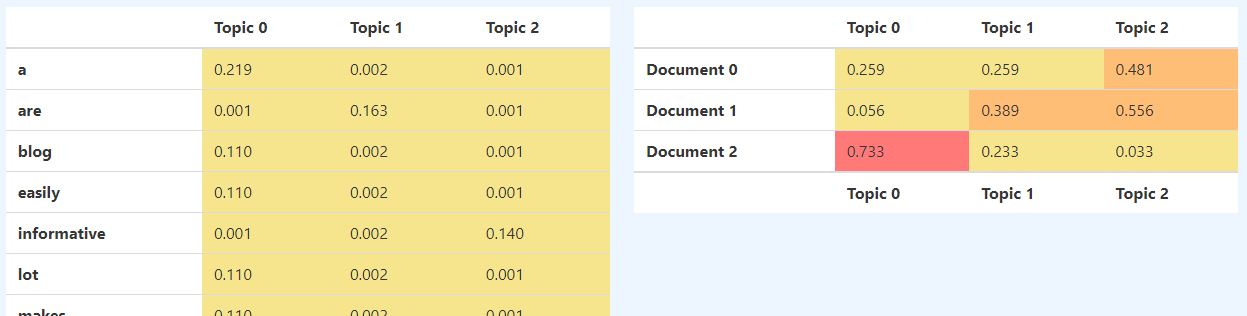

In [49]:
from IPython.display import Image
Image(filename='capture/sample_of_LDA.png')

LDA는 각 토픽의 단어 분포와 각 문서의 토픽 분포를 추정해낸다.

#### LDA 의 가정

LDA는 전체 코퍼스, 즉 다수의 문서들로부터 토픽을 뽑아내기 위해서 하나의 가정을 염두에 두고 있다. 

모든 문서 하나, 하나가 작성될 때 그 문서의 작성자는 아래와 같은 생각을 했다는 가정이다.
- '나는 이 문서를 작성하기 위해서 이런 주제들을 넣을거고, 이런 주제들을 위해서는 이런 단어들을 넣을 거야.'

#### LDA 동영상

55. 텍스트 데이터 분석 [토픽 모델] - (4) LDA 모형
- https://serviceapi.nmv.naver.com/flash/convertIframeTag.nhn?vid=A008B9E1EAFC02C99F92928155487839090E&outKey=V1210ad4156cf64ce0c6a3e18cecaae499f6528784c999ca6541c3e18cecaae499f65&width=544&height=306 참고

#### LDA 실습

위에서 만든 train_data 를 재사용한다고 가정하자.  
train_data 는 DTM 을 위해 역토큰화 과정을 거친 데이터이다.

---
TF-IDF 행렬 생성

In [52]:
# 상위 5,000개의 단어만 사용
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tf_idf_matrix = tfidf_vectorizer.fit_transform(train_data)

# TF-IDF 행렬의 크기를 확인해봅시다.
print('행렬의 크기 :', tf_idf_matrix.shape)

행렬의 크기 : (1054983, 5000)


---
scikit-learn LDA Model 활용

사이킷런의 LDA 모델을 사용하여 학습한다.  
LSA와 마찬가지로 동일한 사이킷런 패키지이므로 앞으로 진행되는 실습 과정은 LSA와 매우 유사하다.

토픽의 개수는 10개로 정했다. 이는 n_components의 인자값이다.

In [53]:
from sklearn.decomposition import LatentDirichletAllocation

lda_model = LatentDirichletAllocation(n_components=10, learning_method='online', random_state=777, max_iter=1)
lda_model.fit_transform(tf_idf_matrix)

array([[0.0335099 , 0.0335099 , 0.0335099 , ..., 0.17024867, 0.0335099 ,
        0.0335099 ],
       [0.03365631, 0.03365631, 0.03365631, ..., 0.03365631, 0.03365631,
        0.03365631],
       [0.25184095, 0.0366096 , 0.0366096 , ..., 0.0366096 , 0.0366096 ,
        0.0366096 ],
       ...,
       [0.26687206, 0.02914502, 0.02914502, ..., 0.13007484, 0.02916018,
        0.28739608],
       [0.10378115, 0.02637829, 0.12325014, ..., 0.02637829, 0.02637829,
        0.02637829],
       [0.03376055, 0.03376055, 0.2255442 , ..., 0.03376055, 0.03376055,
        0.03376055]])

In [54]:
# LDA를 통해 얻은 결과 행렬의 크기를 확인해보자.
print(lda_model.components_.shape)

(10, 5000)


In [56]:
# 전체 코퍼스로부터 얻은 10개의 토픽과 각 토픽에서의 단어의 비중을 보자.
terms = tfidf_vectorizer.get_feature_names() # 단어 집합. 5,000개의 단어가 저장됨.

def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(5)) for i in topic.argsort()[:-n-1:-1]])

get_topics(lda_model.components_, terms)

Topic 1: [('australia', 9359.06334), ('sydney', 5854.97288), ('attack', 4784.76322), ('change', 4193.63035), ('year', 3924.88997)]
Topic 2: [('government', 6344.07413), ('charge', 5947.12292), ('man', 4519.7974), ('state', 3658.16422), ('live', 3625.10473)]
Topic 3: [('australian', 7666.65651), ('say', 7561.01807), ('police', 5513.22932), ('home', 4048.38409), ('report', 3796.04446)]
Topic 4: [('melbourne', 5298.35047), ('south', 4844.59835), ('death', 4281.78433), ('china', 3214.44581), ('women', 3029.28443)]
Topic 5: [('win', 5704.0914), ('canberra', 4322.0963), ('die', 4025.63057), ('open', 3771.65243), ('warn', 3577.47151)]
Topic 6: [('court', 5246.3124), ('world', 4536.86331), ('country', 4166.34794), ('woman', 3983.97748), ('crash', 3793.50267)]
Topic 7: [('election', 5418.5038), ('adelaide', 4864.95604), ('house', 4478.6135), ('school', 3966.82676), ('2016', 3955.11155)]
Topic 8: [('trump', 8189.58575), ('new', 6625.2724), ('north', 3705.40987), ('rural', 3521.42659), ('donald',

### 텍스트 분포를 이용한 비지도 학습 토크나이저 (1) 형태소 분석기와 단어 미등록 문제

지금까지 띄어쓰기 단위의 단어 분포를 이용해서 단어나 문서를 벡터화하는 방법에 대해 알아봤다. 

이번에는 텍스트의 분포를 이용해서 토큰화를 수행하는 비지도 학습 토크나이저에 대해서 알아보자.

#### 형태소 분석기의 필요성

한국어는 교착어이다.  
교착어란 하나의 낱말(엄밀히는 하나의 어절)이 하나의 어근(root)(혹은 어간(stem))과 각각 단일한 기능을 가지는 하나 이상의 접사(affix)의 결합으로 이루어져 있는 언어를 말한다. 조사라는 품사는 교착어에만 존재한다.

이런 특성으로 인해 한국어는 영어와 달리 조사나 접사가 존재하며, 영어처럼 띄어쓰기 단위 토큰화가 제대로 동작하지 않는다.

영어 토큰화를 복습해보자.

다음과 같이 영어 문장은 단순히 띄어쓰기를 수행해도 단어 토큰화가 제대로 동작한다.

In [57]:
en_text = "The dog ran back to the corner near the spare bedrooms"
print(en_text.split())

['The', 'dog', 'ran', 'back', 'to', 'the', 'corner', 'near', 'the', 'spare', 'bedrooms']


한국어의 경우에는 띄어쓰기 단위로 토큰화를 하면 문제가 생긴다.

다음과 같은 한국어 문장을 띄어쓰기 기준으로 토큰화를 진행했다고 해보자.

In [58]:
kor_text = "사과의 놀라운 효능이라는 글을 봤어. 그래서 오늘 사과를 먹으려고 했는데 사과가 썩어서 슈퍼에 가서 사과랑 오렌지 사 왔어"
print(kor_text.split())

['사과의', '놀라운', '효능이라는', '글을', '봤어.', '그래서', '오늘', '사과를', '먹으려고', '했는데', '사과가', '썩어서', '슈퍼에', '가서', '사과랑', '오렌지', '사', '왔어']


이를 해결하기 위해서 한국어는 주로 형태소 분석기를 사용한다.  
가령, 형태소 분석기 중 하나인 Okt를 사용해서 형태소 분석을 할 경우에는 다음 결과를 얻는다.

In [59]:
from konlpy.tag import Okt

tokenizer = Okt()
print(tokenizer.morphs(kor_text))

['사과', '의', '놀라운', '효능', '이라는', '글', '을', '봤어', '.', '그래서', '오늘', '사과', '를', '먹으려고', '했는데', '사과', '가', '썩어서', '슈퍼', '에', '가서', '사과', '랑', '오렌지', '사', '왔어']


---
단어 미등록 문제

하지만 기존의 형태소 분석기는 등록된 단어를 기준으로 형태소를 분류해 내어 새롭게 만들어진 단어를 인식하기 어렵다는 특징이 있다.

In [60]:
print(tokenizer.morphs('모두의연구소에서 자연어 처리를 공부하는 건 정말 즐거워'))

['모두', '의', '연구소', '에서', '자연어', '처리', '를', '공부', '하는', '건', '정말', '즐거워']


'모두의연구소' 는 하나의 단어이지만 위의 형태소 분석 결과에서는 전부 분리된 결과를 보여준다.

그렇다면 텍스트 데이터에서 특정 문자 시퀀스가 함께 자주 등장하는 빈도가 높고, 앞뒤로 조사 또는 완전히 다른 단어가 등장하는 것을 고려해서 해당 문자 시퀀스를 형태소라고 판단하는 형태소 분석기라면 어떨까?

예를 들어,  
'모두의연구소'라는 문자열이 자주 연결되어 등장한다면 형태소라고 판단하고,  
'모두의연구소'라는 단어 앞, 뒤에 '최고', 'AI', '실력'과 같은 독립된 다른 단어들이 계속해서 등장한다면 '모두의연구소'를 형태소로 파악하는 식이다. 

이런 아이디어를 가진 형태소 분석기가 soynlp 이다.

### 텍스트 분포를 이용한 비지도 학습 토크나이저 (2) soynlp

soynlp는 품사 태깅, 형태소 분석 등을 지원하는 한국어 형태소 분석기이다.

비지도 학습으로 형태소 분석을 한다는 특징을 갖고 있으며, 데이터에 자주 등장하는 단어들을 형태소로 분석한다.

soynlp 형태소 분석기는 내부적으로 단어 점수표로 동작한다.  
이 점수는 응집 확률(cohesion probability) 과 브랜칭 엔트로피(branching entropy) 를 활용한다.

#### soynlp 실습

In [62]:
# 예제 말뭉치를 다운로드
import urllib.request

txt_filename = './data/2016-10-20.txt'

urllib.request.urlretrieve("https://raw.githubusercontent.com/lovit/soynlp/master/tutorials/2016-10-20.txt",\
                            filename=txt_filename)

('./data/2016-10-20.txt', <http.client.HTTPMessage at 0x1739f424b80>)

In [64]:
# 다운로드 한 말뭉치를 문서 단위로 분리
from soynlp import DoublespaceLineCorpus

# 말뭉치에 대해서 다수의 문서로 분리
corpus = DoublespaceLineCorpus(txt_filename)
len(corpus)

30091

In [66]:
# 총 30,091개의 문서가 존재한다. 공백이 아닌 문서에 한해 상위 3개의 문서만 출력해보자.
i = 0
for document in corpus:
    if len(document) > 0:
        print(document)
        i = i+1
    if i == 3:
        break

19  1990  52 1 22
오패산터널 총격전 용의자 검거 서울 연합뉴스 경찰 관계자들이 19일 오후 서울 강북구 오패산 터널 인근에서 사제 총기를 발사해 경찰을 살해한 용의자 성모씨를 검거하고 있다 성씨는 검거 당시 서바이벌 게임에서 쓰는 방탄조끼에 헬멧까지 착용한 상태였다 독자제공 영상 캡처 연합뉴스  서울 연합뉴스 김은경 기자 사제 총기로 경찰을 살해한 범인 성모 46 씨는 주도면밀했다  경찰에 따르면 성씨는 19일 오후 강북경찰서 인근 부동산 업소 밖에서 부동산업자 이모 67 씨가 나오기를 기다렸다 이씨와는 평소에도 말다툼을 자주 한 것으로 알려졌다  이씨가 나와 걷기 시작하자 성씨는 따라가면서 미리 준비해온 사제 총기를 이씨에게 발사했다 총알이 빗나가면서 이씨는 도망갔다 그 빗나간 총알은 지나가던 행인 71 씨의 배를 스쳤다  성씨는 강북서 인근 치킨집까지 이씨 뒤를 쫓으며 실랑이하다 쓰러뜨린 후 총기와 함께 가져온 망치로 이씨 머리를 때렸다  이 과정에서 오후 6시 20분께 강북구 번동 길 위에서 사람들이 싸우고 있다 총소리가 났다 는 등의 신고가 여러건 들어왔다  5분 후에 성씨의 전자발찌가 훼손됐다는 신고가 보호관찰소 시스템을 통해 들어왔다 성범죄자로 전자발찌를 차고 있던 성씨는 부엌칼로 직접 자신의 발찌를 끊었다  용의자 소지 사제총기 2정 서울 연합뉴스 임헌정 기자 서울 시내에서 폭행 용의자가 현장 조사를 벌이던 경찰관에게 사제총기를 발사해 경찰관이 숨졌다 19일 오후 6시28분 강북구 번동에서 둔기로 맞았다 는 폭행 피해 신고가 접수돼 현장에서 조사하던 강북경찰서 번동파출소 소속 김모 54 경위가 폭행 용의자 성모 45 씨가 쏜 사제총기에 맞고 쓰러진 뒤 병원에 옮겨졌으나 숨졌다 사진은 용의자가 소지한 사제총기  신고를 받고 번동파출소에서 김창호 54 경위 등 경찰들이 오후 6시 29분께 현장으로 출동했다 성씨는 그사이 부동산 앞에 놓아뒀던 가방을 챙겨 오패산 쪽으로 도망간 후였다  김 경위는 오패산 터널 입구 오른쪽의 급경사에서 성씨에

---
soynlp는 비지도학습 형태소 분석기이므로 기존의 형태소 분석기와는 달리 학습 과정을 거쳐야 한다. 

전체 코퍼스로부터 응집 확률과 브랜칭 엔트로피 단어 점수표를 만드는 과정이다. 

WordExtractor.extract()를 통해서 전체 코퍼스에 대해 단어 점수표를 계산할 수 있다.

In [67]:
from soynlp.word import WordExtractor

word_extractor = WordExtractor()
word_extractor.train(corpus)
word_score_table = word_extractor.extract()

training was done. used memory 2.685 Gb
all cohesion probabilities was computed. # words = 223348
all branching entropies was computed # words = 361598
all accessor variety was computed # words = 361598


#### soynlp의 응집 확률(cohesion probability)

응집 확률은 내부 문자열(substring)이 얼마나 응집하여 자주 등장하는지를 판단하는 척도이다.

응집 확률은 문자열을 문자 단위로 분리하여 내부 문자열을 만드는 과정에서, 왼쪽부터 순서대로 문자를 추가하면서 각 문자열이 주어졌을 때 그다음 문자가 나올 확률을 계산하여 누적 곱을 한 값이다.

이 값이 높을수록 전체 코퍼스에서 이 문자열 시퀀스는 하나의 단어로 등장할 가능성이 높다.

실습을 통해 직접 응집 확률을 계산해 보자.

In [68]:
word_score_table["반포한"].cohesion_forward

0.08838002913645132

In [69]:
word_score_table["반포한강"].cohesion_forward

0.19841268168224552

In [70]:
word_score_table["반포한강공"].cohesion_forward

0.2972877884078849

In [71]:
word_score_table["반포한강공원"].cohesion_forward

0.37891487632839754

In [72]:
word_score_table["반포한강공원에"].cohesion_forward

0.33492963377557666

응집 확률이 최대화가 되는 내부 문자열 구간은 '반포한강공원' 이다. 

다시 말해 '반포한강공원'이 하나의 단어일 확률이 높다.

#### soynlp의 브랜칭 엔트로피(branching entropy)

브랜칭 엔트로피(Branching Entropy) 는 확률 분포의 엔트로피값을 사용한다. 

이는 주어진 문자열에서 다음 문자가 등장할 수 있는 가능성을 판단하는 척도이다.

브랜칭 엔트로피를 주어진 문자 시퀀스에서 다음 문자 예측을 위해 헷갈리는 정도라고 비유해 보자. 

브랜칭 엔트로피의 값은 하나의 완성된 단어에 가까워질수록 문맥으로 인해 정확히 예측할 수 있게 되므로 점차 줄어든다.

In [74]:
word_score_table["디스"].right_branching_entropy

1.6371694761537934

In [75]:
word_score_table["디스플"].right_branching_entropy

-0.0

In [76]:
word_score_table["디스플레"].right_branching_entropy

-0.0

In [77]:
word_score_table["디스플레이"].right_branching_entropy

3.1400392861792916

갑자기 값이 급증한다. 

그 이유는 문자 시퀀스 '디스플레이'라는 문자 시퀀스 다음에는 조사나 다른 단어가 나올 수 있는 다양한 경우가 있을 수 있기 때문이다. 

즉 하나의 단어가 끝나면 그 경계 부분부터 다시 브랜칭 엔트로피값이 증가함을 의미한다.

그러면 이 값으로 단어를 판단하는 것이 가능하겠죠?

soynlp 패키지는 이렇게 계산한 점수를 사용해 두 가지 문자열 토큰화 방법을 제공한다.

#### soynlp의 LTokenizer

띄어쓰기 단위로 잘 나뉜 문장은 L 토크나이저(LTokenizer)를 사용하면 좋다.

한국어는 띄어쓰기 단위로 나눈 어절 토큰이 주로 L 토큰 + R 토큰의 형식을 가질 때가 많다. 
예를 들어서 '공원에'는 '공원 + 에'로 나눌 수 있다. 또는 '공부하는'은 '공부 + 하는'으로 나눌 수도 있다. 

L 토크나이저는 L 토큰 + R 토큰으로 나누되, 점수가 가장 높은 L 토큰을 찾아내는 분리 기준을 가지고 있다.

In [78]:
from soynlp.tokenizer import LTokenizer

scores = {word:score.cohesion_forward for word, score in word_score_table.items()}
l_tokenizer = LTokenizer(scores=scores)
l_tokenizer.tokenize("국제사회와 우리의 노력들로 범죄를 척결하자", flatten=False)

[('국제사회', '와'), ('우리', '의'), ('노력', '들로'), ('범죄', '를'), ('척결', '하자')]

#### 최대 점수 토크나이저

최대 점수 토크나이저(MaxScoreTokenizer)는 
- 띄어쓰기가 되어 있지 않은 문장에서 점수가 높은 글자 시퀀스를 순차적으로 찾아내는 토크나이저이다. 

띄어쓰기가 되어 있지 않은 문장을 넣어서 토큰화된 결과를 점수를 통해 알아보자.

In [79]:
from soynlp.tokenizer import MaxScoreTokenizer

maxscore_tokenizer = MaxScoreTokenizer(scores=scores)
maxscore_tokenizer.tokenize("국제사회와우리의노력들로범죄를척결하자")

['국제사회', '와', '우리', '의', '노력', '들로', '범죄', '를', '척결', '하자']